In [16]:
from matplotlib import pyplot as plt
import numpy as np
import random
import networkx as nx
import math
import scipy.special
from statistics import mean,stdev

# Part 1: Binning degree distributions


A. Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
  
<font color='#00008B'>
Numpy.histogram returns an array containing the number of items in each of the 10 bins and another array with the edges of each bin. The two arrays have different length as the edges one contains n + 1 elements (n being the number of bins). <br>
One easy solution is just to use the built in method plt.hist which deals with this difference of size in the arrays. However if ploting from scratch with a bar method, we can remove the last element of the edges array and add a width parameter calculated with the difference of each consecutives edges. This gives us an array of size n.</font>


<BarContainer object of 10 artists>

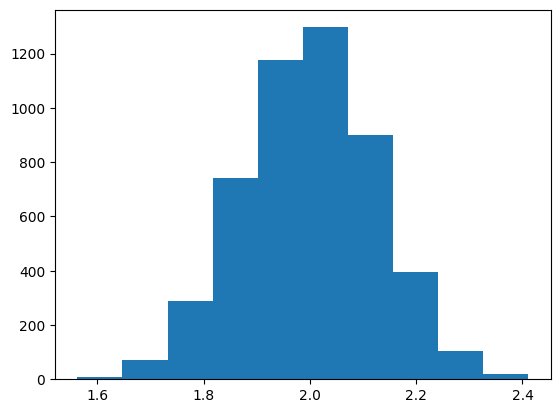

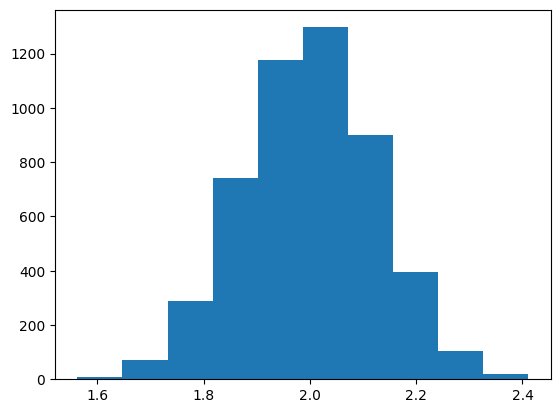

In [4]:
#Generation 500 data points from a Gaussian distribution
s = np.random.normal(2, 0.125, 5000)
#Binning the numbers into 10 bins
nb, bins = np.histogram(s,10)
#The two arrays (items per bin and size of each bin namely bin edges) have different length
plt.hist(s, bins) #easy way

#Using bar method from matplolib
#It is required to use the width of each bar and to use only the n-1 first edges of the bins
fig, ax = plt.subplots()
ax.bar(bins[:-1], nb, width=np.diff(bins), align="edge")


B. Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution
  <br>
  
 <font color='#00008B'>
It is correct to set the first entry of the vector $v$ to be the smallest value and the last entry the largest value in order to include these values into the binning. Since the bins are not centered on each integer, having this set up will make each bin corresponds to the integer on the right side edge. The sum over bin counts is the number of numbers drown from the distribution. The relation between first and last vector element and the min and max of the distribution is as described earlier in this paragraph.</font>

5000


<BarContainer object of 22 artists>

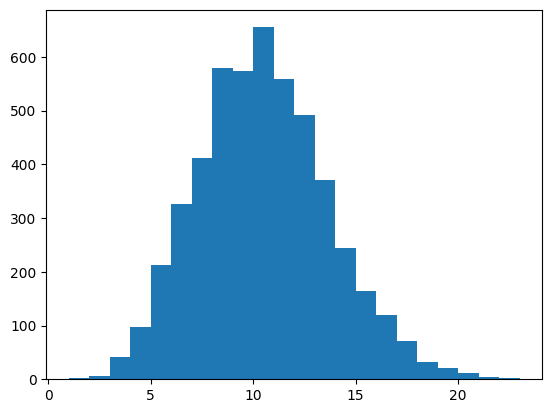

In [5]:
#Generating 5000 numbers drown from a Poisson distribution (lamda = 10)
s = np.random.poisson(10, 5000)
min_s = min(s)
max_s = max(s)

#Creating a vector containing all possible integers from min_s to max_s
v = np.linspace(min_s, max_s, max_s)

#Binning the random numbers into the generated vector
nb, bins = np.histogram(s,v)
print(sum(nb))

fig, ax = plt.subplots()
ax.bar(bins[:-1], nb, width=np.diff(bins), align="edge")

C. Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
  
  <br>
  <font color='#00008B'>
Given that $\langle k \rangle = p (N-1)$ we derive p from the equation with the average degree, $k = 10$ </font>

Text(0, 0.5, 'Number of nodes')

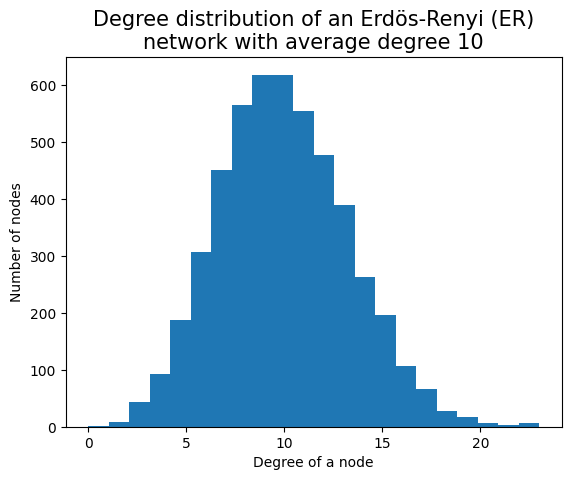

In [6]:
#Values to be used for the Erdös-Renyi (ER) network
p = 10 / (5000-1)
N = 5000
G = nx.erdos_renyi_graph(N, p, seed=None, directed=False)

#Returns the degree distribution of our network
degree_distribution = sorted((d for n, d in G.degree()), reverse=True)

#Generating a bar plot of the degree distribution following the same method as previously
min_s = min(degree_distribution)
max_s = max(degree_distribution)

v = np.linspace(min_s, max_s, max_s)

nb, bins = np.histogram(degree_distribution,v)

fig, ax = plt.subplots()
ax.bar(bins[:-1], nb, width=np.diff(bins), align="edge")
ax.set_title("Degree distribution of an Erdös-Renyi (ER)"+ "\n" + "network with average degree 10",fontsize = 15)
ax.set_xlabel("Degree of a node")
ax.set_ylabel("Number of nodes")

# Part 2: Random networks and plotting in `networkx`
 
A. In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.


In [7]:
#Erdős-Rényi Networks

N = 3000
p = 10e-3
L_exp = p*(N*(N-1))/2
print('Expected number of links : {}'.format(L_exp))
D_avg = p*(N-1)
print('Average degree : {}'.format(D_avg))

print("Network is in connected regime" if D_avg > math.log(N) else"Network is not in connected regime" ) #Returns True hence the network is in Connected Regime

pc = 1/N
print('Probably pc so that network is at cricital point : {}'.format(pc))

#When <k> = ln(N) then we expect to have only one component
#We have  p*(N-1) = ln (N) -> N = 648 (Wolfram Alpha equation solved) 
Ncr = 648
print('Number of nodes with p = 10e-3 so that the network has only one component : {}'.format(Ncr ))

#Network in d) Super critical regime
kcr = math.log(N)
print('Average degree for the network in super critical regime : {}'.format(kcr ))
d_avg = 1
print('Average distance between randomly chosen nodes : {}'.format(d_avg))

#Degree distribution pk for the network
pk = scipy.special.binom(N-1, D_avg)* (p**D_avg) * ((1-p)**(N-1-D_avg))
print('Degree distribution : {}'.format(pk))


Expected number of links : 44985.0
Average degree : 29.990000000000002
Network is in connected regime
Probably pc so that network is at cricital point : 0.0003333333333333333
Number of nodes with p = 10e-3 so that the network has only one component : 648
Average degree for the network in super critical regime : 8.006367567650246
Average distance between randomly chosen nodes : 1
Degree distribution : 0.07301252746883477



B. Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

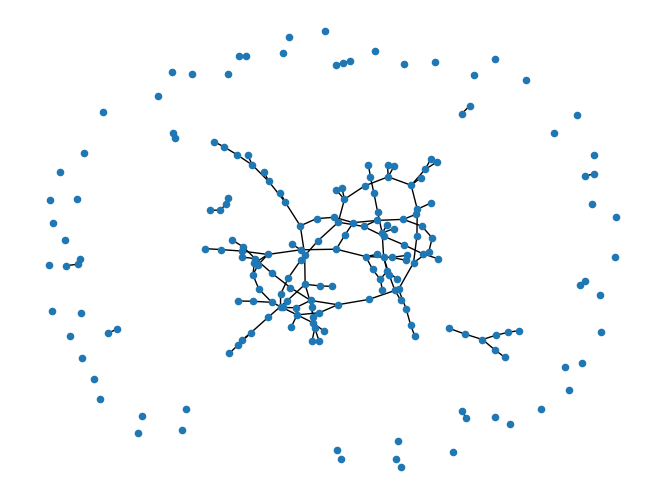

In [8]:
#Random network with 200 nodes and an average degree of 1.5
G = nx.erdos_renyi_graph(200, p = 1.5 / (200-1), seed=None, directed=False)
nx.draw_spring(G,node_size = 20)

Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)

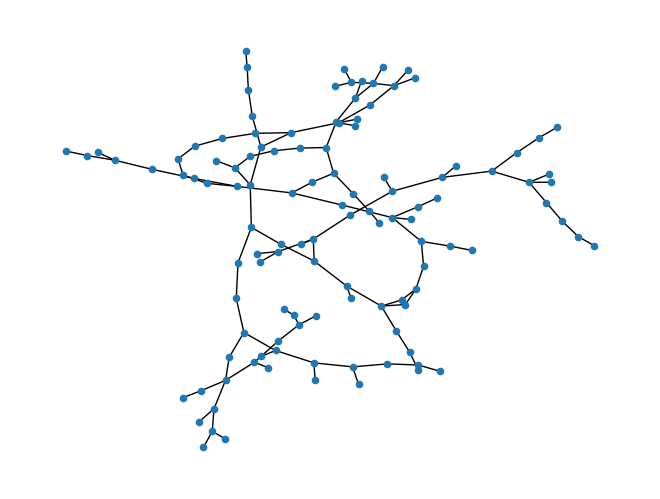

In [9]:
#Extraction of the giant component
largest_cc = max(nx.connected_components(G), key=len)
S = G.subgraph(largest_cc).copy() 
nx.draw_spring(S,node_size = 20)

  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

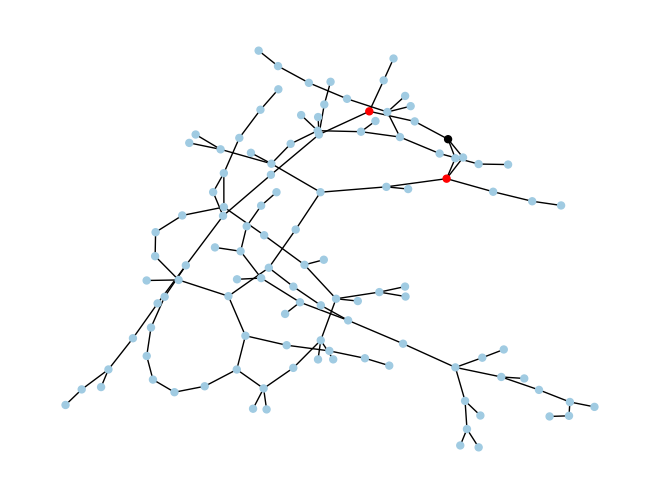

In [10]:
from random import choice

random_node = choice(list(S.nodes()))
paths=nx.single_source_shortest_path_length(G=S,source=random_node,cutoff=2)

color_map = []
for node in S:
    if node == random_node:
        color_map.append('#000000')
    elif node in paths:
        if paths[node] == 2:
            color_map.append('#ff0000')
        else: 
            color_map.append('#A0CBE2')
    else: 
        color_map.append('#A0CBE2')  

nx.draw_spring(S, node_color=color_map, node_size = 25)

# Part 3: Watts-Strogatz Networks

A. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

  <br>
  <font color='#00008B'>
When p=1 we get a random network.</font>


With probability P0, the average shortest path lenght is 62.875751503006015
With probability P0.1, the average shortest path lenght is 7.571647294589178
With probability P1, the average shortest path lenght is 4.741579158316633


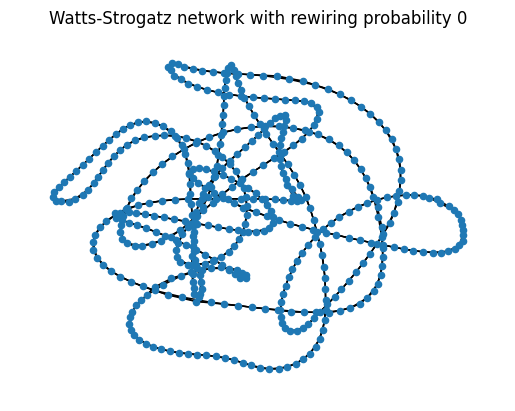

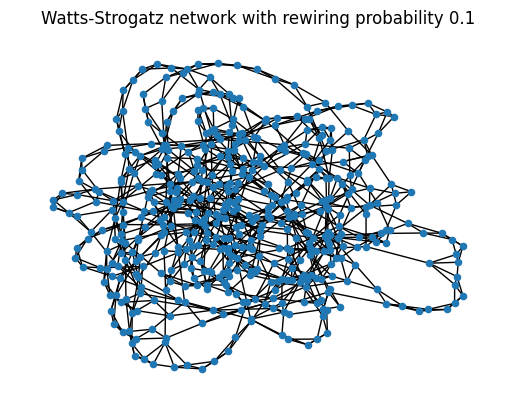

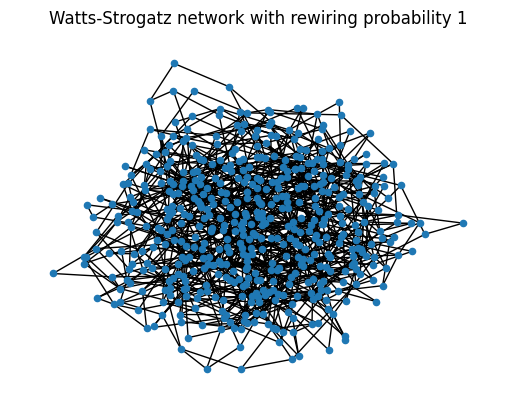

In [14]:
for index,p in enumerate([0,0.1,1]):
    G = nx.watts_strogatz_graph(500,4,p)
    plt.figure(index)
    plt.title("Watts-Strogatz network with rewiring probability {}".format(p))
    nx.draw_spring(G,node_size = 20)
    print("With probability P{}, the average shortest path lenght is {}".format(p,nx.average_shortest_path_length(G)))

B. Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

In [21]:
avg_d = []
std = []
p = [0,0.01,0.03,0.05,0.1,0.2]
for index,p in enumerate(p):
    print("Generating 50 networks for p={} ...".format(p))
    d=[]
    for _ in range(50):
        G = nx.watts_strogatz_graph(500,4,p)
        average_degree = nx.average_shortest_path_length(G)
        d.append(average_degree)
    avg_d.append(mean(d))
    std.append(stdev(d))
                

Generating 50 networks for p=0 ...
Generating 50 networks for p=0.01 ...
Generating 50 networks for p=0.03 ...
Generating 50 networks for p=0.05 ...
Generating 50 networks for p=0.1 ...
Generating 50 networks for p=0.2 ...


Text(0.5, 0, 'Rewiring probability p')

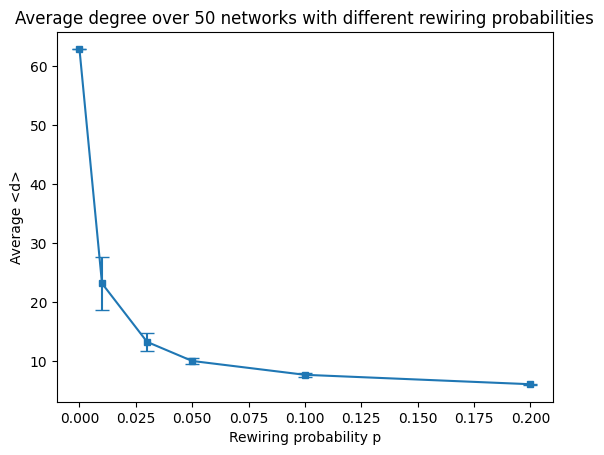

In [44]:
plt.errorbar(p,avg_d, yerr=std, marker='s',ms=4,capsize=5)
plt.title("Average degree over 50 networks with different rewiring probabilities")
plt.ylabel("Average <d>")
plt.xlabel("Rewiring probability p")